In [6]:
# Prepare the training data

import pandas as pd
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [7]:
# Prepare the target data

import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                        1000.0])

In [16]:
# Prepare training sets and target sets

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

In [18]:
# Using transformer to convert them into polynomial

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)                             # Train to convert
train_poly = poly.transform(train_input)          # Convert for training
print(f"train_poly.shape: {train_poly.shape}")
print(f"poly.get_feature_names_out(): {poly.get_feature_names_out()}")

test_poly = poly.transform(test_input)            # Convert for test 

train_poly.shape: (42, 9)
poly.get_feature_names_out(): ['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [52]:
# Normalization before evaluating regulation method performance
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled  = ss.transform(test_poly)

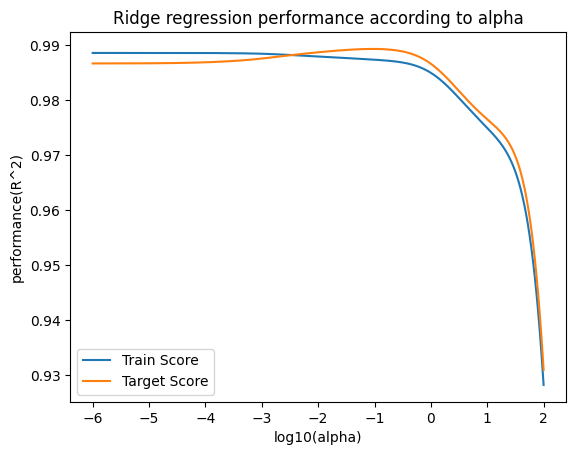

Maximized performance(R^2) was 0.9893506773193195 when alpha was 0.09120108393556878


In [60]:
# Ridge regression, find the most appropriate alpha value
# which determines the intensity of regulation to the model

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

# Find an optimal alpha value in Ridge

import matplotlib.pyplot as plt

train_score     = []
test_score      = []
max_performance = { "alpha" : None, "r2" : 0 }
alpha_list_log10 = np.arange(-6, 2 + 0.01, 0.01)

for alpha_log10 in alpha_list_log10:
  alpha = 10 ** alpha_log10
  
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_r2 = ridge.score(train_scaled, train_target)
  test_r2  = ridge.score(test_scaled, test_target)
  train_score.append(train_r2)
  test_score.append(test_r2)

  if test_r2 > max_performance["r2"]:
    max_performance["alpha"] = alpha
    max_performance["r2"]    = test_r2

# visualize
plt.plot(alpha_list_log10, train_score, label = "Train Score")
plt.plot(alpha_list_log10, test_score, label = "Target Score")
plt.xlabel("log10(alpha)")
plt.ylabel("performance(R^2)")
plt.title("Ridge regression performance according to alpha")
plt.legend()

plt.show()

print(f"Maximized performance(R^2) was {max_performance['r2']} when alpha was {max_performance['alpha']}")

max_ridge_performance = max_performance['r2']

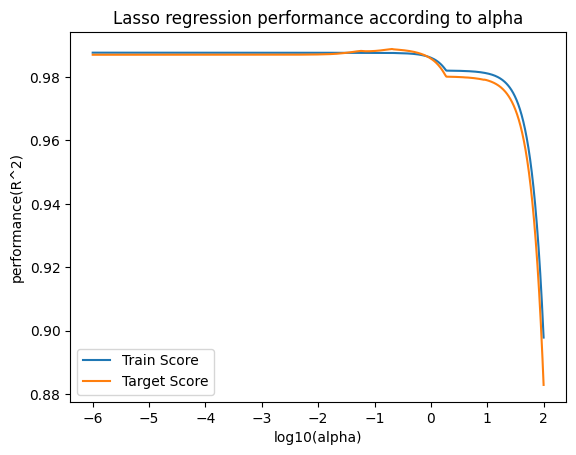

Maximized performance(R^2) was 0.9888791459652218 when alpha was 0.19952623149683604


In [64]:
# Lasso regression, find the most appropriate alpha value
# which determines the intensity of regulation to the model

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

# Find an optimal alpha value in Ridge

# import matplotlib.pyplot as plt       (duplicated)

train_score     = []
test_score      = []
max_performance = { "alpha" : None, "r2" : 0 }
alpha_list_log10 = np.arange(-6, 2 + 0.01, 0.01)

for alpha_log10 in alpha_list_log10:
  alpha = 10 ** alpha_log10
  
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_r2 = lasso.score(train_scaled, train_target)
  test_r2  = lasso.score(test_scaled, test_target)
  train_score.append(train_r2)
  test_score.append(test_r2)

  if test_r2 > max_performance["r2"]:
    max_performance["alpha"] = alpha
    max_performance["r2"]    = test_r2

# visualize
plt.plot(alpha_list_log10, train_score, label = "Train Score")
plt.plot(alpha_list_log10, test_score, label = "Target Score")
plt.xlabel("log10(alpha)")
plt.ylabel("performance(R^2)")
plt.title("Lasso regression performance according to alpha")
plt.legend()

plt.show()

print(f"Maximized performance(R^2) was {max_performance['r2']} when alpha was {max_performance['alpha']}")

max_lasso_performance = max_performance['r2']

In [75]:
# Finalize evaluation

if max_ridge_performance >= max_lasso_performance:
  print(f"Ridge won {round((max_ridge_performance / max_lasso_performance) * 100 - 100, 5)}% more than Lasso, which R^2 value was {max_ridge_performance}")
else:
  print(f"Lasso won {round((max_lasso_performance / max_ridge_performance) * 100 - 100, 5)}% more than Ridge, which R^2 value was {max_lasso_performance}")

Ridge won 0.04768% more than Lasso, which R^2 value was 0.9893506773193195
